# Predvidjanje metaboličkog sindroma kod adolescenata

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from collections import Counter
%matplotlib inline

df=pd.read_csv('metabolicki_sindrom.csv',encoding= 'unicode_escape')
df.head()

,IME,PREZIME,UZRAST,GOJAZNOST (R),HIPERTENZIJA (R),E?ERNA BOLEST (R),HIPERLIPIDEMIJA (R),OS(cm),OS (percentil),TRIGLICERIDI,HDL,SISTOLNI PRITISAK,DIJASTOLNI PRITISAK,UK,E?ERNA BOLEST,METABOLI?KI SINDROM
0,Sr?an,Miji?,11.000,0,0,0,0,107.0,>90,1.07,1.10,135,90,4.80,0,0
1,Vuk,Jovanovi?,11.166,1,0,1,0,87.0,>90,1.15,1.20,100,65,5.40,1,0
2,Petra,Kova?,14.166,1,0,0,0,84.0,75,0.44,0.70,115,80,4.96,0,0
3,Aleksandar,Petrovi?,12.166,0,0,0,0,92.0,>90,1.15,1.20,115,75,4.20,0,0
4,Lina,Kandil,15.916,0,0,1,0,111.0,>90,0.76,1.48,130,90,5.32,0,0


Podaci nad kojima radim predvidjanje sakupljeni su iz baza podataka bolnica najvećim delom sa teritorija Vojvodine. Pojedinačni unosi u tabeli predstavljaju po jednog pacijenta uzrasta između 10 i 18 godina.

## Analiziranje podataka i predprocesiranje

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IME                  151 non-null    object 
 1   PREZIME              151 non-null    object 
 2   UZRAST               151 non-null    float64
 3   GOJAZNOST (R)        151 non-null    int64  
 4   HIPERTENZIJA (R)     151 non-null    int64  
 5   E?ERNA BOLEST (R)   151 non-null    int64  
 6   HIPERLIPIDEMIJA (R)  151 non-null    int64  
 7   OS(cm)               151 non-null    float64
 8   OS (percentil)       151 non-null    object 
 9   TRIGLICERIDI         151 non-null    float64
 10  HDL                  151 non-null    float64
 11  SISTOLNI PRITISAK    151 non-null    int64  
 12  DIJASTOLNI PRITISAK  151 non-null    int64  
 13  UK                  151 non-null    float64
 14  E?ERNA BOLEST       151 non-null    int64  
 15  METABOLI?KI SINDROM  151 non-null    int

Dataset se sastoji iz 16 kolona i 151 reda. Kolone su ime, prezime, uzrast,zatim gojaznost, hipertenzija i šećerna bolest kod roditelja, 
hiperlipidemija, obim struka u cm, obim struka u percentilima, trigliceridi, hdl, sistolni pritisak, dijastolni pritisak, 
nivo šećera u krvi, šećerna bolest kod pacijenta i prisustvo metaboličkog sindroma kod pacijenta.

Iz informacija o podacima u tabeli vidimo da nema null vrednosti i da su podaci tipa int, float i object (string). S obzirom da su ime i prezime irelevanti podaci, ukloniću te dve kolone i pritom će kao object tip podataka ostati samo kolona OS percentili koju ću enkodirati.

In [3]:
df=df.drop(columns=['IME','PREZIME'])
for col in df.columns:
    print("Column name: ",col," unique values: ",len(df[col].unique()))

Column name:  UZRAST  unique values:  63
Column name:  GOJAZNOST (R)  unique values:  2
Column name:  HIPERTENZIJA (R)  unique values:  2
Column name:  E?ERNA BOLEST (R)  unique values:  2
Column name:  HIPERLIPIDEMIJA (R)  unique values:  2
Column name:  OS(cm)  unique values:  58
Column name:  OS (percentil)  unique values:  3
Column name:  TRIGLICERIDI  unique values:  79
Column name:  HDL  unique values:  52
Column name:  SISTOLNI PRITISAK  unique values:  17
Column name:  DIJASTOLNI PRITISAK  unique values:  12
Column name:  UK  unique values:  62
Column name:  E?ERNA BOLEST  unique values:  2
Column name:  METABOLI?KI SINDROM  unique values:  2


Vidimo da gojaznost, hipertenzija, hiperlipidemija i šećerna bolest kod roditelja, zatim obim struka u percintilima, šećerna bolest i metabolički sindrom kod pacijenta imaju drastično manje jedinstvenih podataka od ostalih kolona, što može da ukazuje na to da su to neke kategoričke vrednosti.

In [4]:
cols=['GOJAZNOST (R)','HIPERTENZIJA (R)','E?ERNA BOLEST (R)','HIPERLIPIDEMIJA (R)','OS (percentil)','E?ERNA BOLEST','METABOLI?KI SINDROM']
for col in cols:
    print("Column name: ",col," unique values: ",df[col].unique())

Column name:  GOJAZNOST (R)  unique values:  [0 1]
Column name:  HIPERTENZIJA (R)  unique values:  [0 1]
Column name:  E?ERNA BOLEST (R)  unique values:  [0 1]
Column name:  HIPERLIPIDEMIJA (R)  unique values:  [0 1]
Column name:  OS (percentil)  unique values:  ['>90' '75' '50']
Column name:  E?ERNA BOLEST  unique values:  [0 1]
Column name:  METABOLI?KI SINDROM  unique values:  [0 1]


Iz gore priloženog ispisa vidimo da ovo zaista jesu kategoričke kolone, s tim što obim struka još nije enkodiran pa ću sada izvršiti i njegovo enkodiranje.

In [5]:
df["OS (percentil)"] = df["OS (percentil)"].astype('category')
df["OS (percentil)"] = df["OS (percentil)"].cat.codes
df.head()


,UZRAST,GOJAZNOST (R),HIPERTENZIJA (R),E?ERNA BOLEST (R),HIPERLIPIDEMIJA (R),OS(cm),OS (percentil),TRIGLICERIDI,HDL,SISTOLNI PRITISAK,DIJASTOLNI PRITISAK,UK,E?ERNA BOLEST,METABOLI?KI SINDROM
0,11.000,0,0,0,0,107.0,2,1.07,1.10,135,90,4.80,0,0
1,11.166,1,0,1,0,87.0,2,1.15,1.20,100,65,5.40,1,0
2,14.166,1,0,0,0,84.0,1,0.44,0.70,115,80,4.96,0,0
3,12.166,0,0,0,0,92.0,2,1.15,1.20,115,75,4.20,0,0
4,15.916,0,0,1,0,111.0,2,0.76,1.48,130,90,5.32,0,0


Sada umesto vrednosti '>90' imamo vrednost 2, za '75' vrednost je 1, a za '50' je 0.

Kako bismo bolje razumeli o kakvim podacima je reč, predsaviću neke njihove osnovne statističke podatke.

In [6]:
data=df[['UZRAST','OS(cm)','TRIGLICERIDI','HDL','SISTOLNI PRITISAK','DIJASTOLNI PRITISAK','UK']].describe().round(2)
data

,UZRAST,OS(cm),TRIGLICERIDI,HDL,SISTOLNI PRITISAK,DIJASTOLNI PRITISAK,UK
count,151.00,151.00,151.00,151.00,151.00,151.00,151.00
mean,13.70,94.41,1.29,1.27,124.64,81.29,4.64
std,2.04,15.30,0.53,0.99,17.17,12.76,0.47
min,10.00,65.00,0.44,0.70,90.00,55.00,3.38
25%,12.17,84.25,0.90,1.02,110.00,72.50,4.40
50%,13.50,96.00,1.10,1.20,120.00,80.00,4.63
75%,15.17,103.00,1.52,1.38,140.00,90.00,4.89
max,17.83,172.00,2.99,13.00,210.00,150.00,5.90


U tabeli su priložene maksimalne i minimalne vrednosti svake kolone kao i prosečna vrednost. Standardna devijacija predstavlja prosečno odstupanje od aritmetičke sredine. Takođe imamo i vrednosti za 25, 50. i 75. percentil svake kolone.

# Vizuelizacija podataka

Vizuelizacija je još jedan bitan korak u razumevanja podatak koji su nam na raspolaganju. Zato se ova sekcija bavi prikazivanje svake od kolona vizuelno, kao i vizualizovanje međusobnog uticaja jednih kolona na druge.

Svaka od kolona sa kontinualnim vrednostima predstavljenja je pomoću boxplot-a koji jasno prikazuje i osnovne statističke karakteristike kolone.

### Prikaz uzrasta

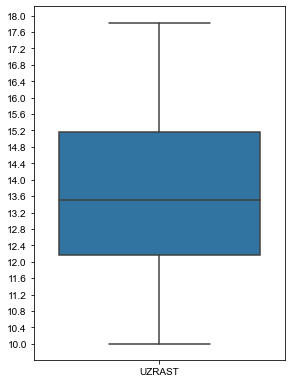

In [7]:
fig1,ax1=plt.subplots()
fig1.set_size_inches(4.5, 6.5)
sns.set_style("whitegrid")
bp=sns.boxplot(data = df[['UZRAST']])
bp.yaxis.set_major_locator(plt.MaxNLocator(18, min_n_ticks=18))

### Prikaz obima struka u cm

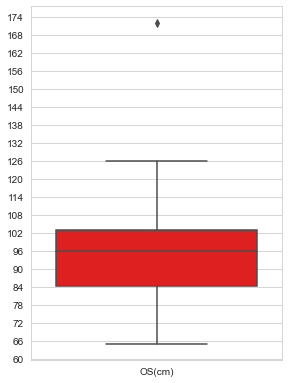

In [8]:
fig1,ax1=plt.subplots()
fig1.set_size_inches(4.5, 6.5)
sns.set_style("whitegrid")
bp=sns.boxplot(data = df[['OS(cm)']],color='r')
bp.yaxis.set_major_locator(plt.MaxNLocator(18, min_n_ticks=18))

### Prikaz triglicerida

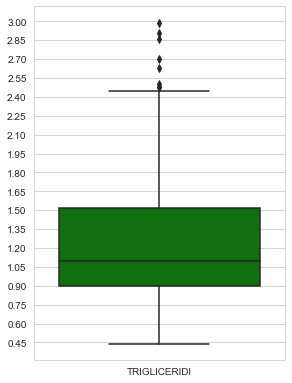

In [9]:
fig1,ax1=plt.subplots()
fig1.set_size_inches(4.5, 6.5)
sns.set_style("whitegrid")
bp=sns.boxplot(data = df[['TRIGLICERIDI']],color='g')
bp.yaxis.set_major_locator(plt.MaxNLocator(18, min_n_ticks=18))

### Prikaz HDL vrednosti

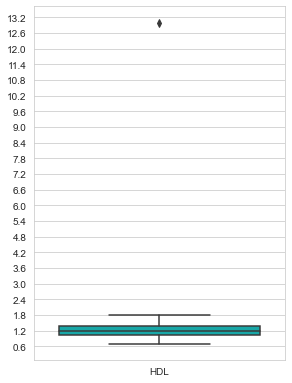

In [10]:
fig1,ax1=plt.subplots()
fig1.set_size_inches(4.5, 6.5)
sns.set_style("whitegrid")
bp=sns.boxplot(data = df[['HDL']],color='c')
bp.yaxis.set_major_locator(plt.MaxNLocator(18, min_n_ticks=18))

### Prikaz sistolnog pritiska

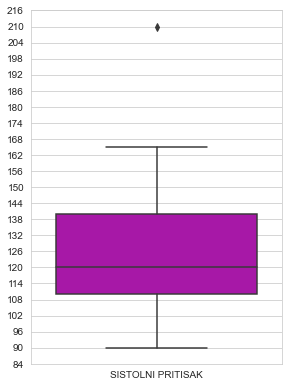

In [11]:
fig1,ax1=plt.subplots()
fig1.set_size_inches(4.5, 6.5)
sns.set_style("whitegrid")
bp=sns.boxplot(data = df[['SISTOLNI PRITISAK']],color='m')
bp.yaxis.set_major_locator(plt.MaxNLocator(18, min_n_ticks=18))

### Prikaz dijastolnog pritiska

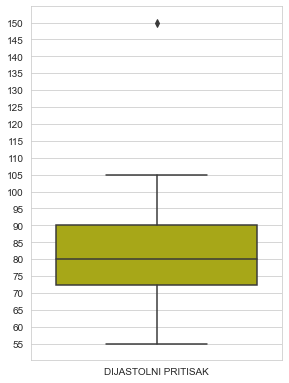

In [12]:
fig1,ax1=plt.subplots()
fig1.set_size_inches(4.5, 6.5)
sns.set_style("whitegrid")
bp=sns.boxplot(data = df[['DIJASTOLNI PRITISAK']],color='y')
bp.yaxis.set_major_locator(plt.MaxNLocator(18, min_n_ticks=18))

### Prikaz nivoa šećera u krvi

C:\Users\Tasa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tasa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0, flags=flags)


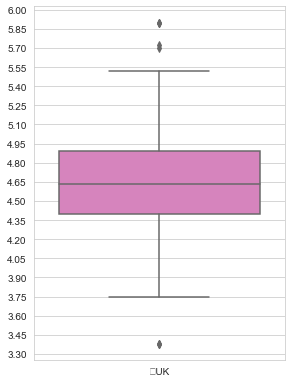

In [13]:
fig1,ax1=plt.subplots()
fig1.set_size_inches(4.5, 6.5)
sns.set_style("whitegrid")
bp=sns.boxplot(data = df[['UK']],color='tab:pink')
bp.yaxis.set_major_locator(plt.MaxNLocator(18, min_n_ticks=18))

Kategoričke vrednosti je najbolje predstaviti preko countplot-a, jer možemo da najjasnije vidimo odnos različitih vredosti unutar kolone.

### Prikaz prisustva gojaznosti, hipertenzije, šećerne bolesti i hiperlipidemije kod roditelja pacijenta

array([<AxesSubplot:xlabel='GOJAZNOST (R)', ylabel='count'>,
       <AxesSubplot:xlabel='HIPERTENZIJA (R)', ylabel='count'>,
       <AxesSubplot:xlabel='\x8aE?ERNA BOLEST (R)', ylabel='count'>,
       <AxesSubplot:xlabel='HIPERLIPIDEMIJA (R)', ylabel='count'>],
      dtype=object)

C:\Users\Tasa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tasa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0, flags=flags)


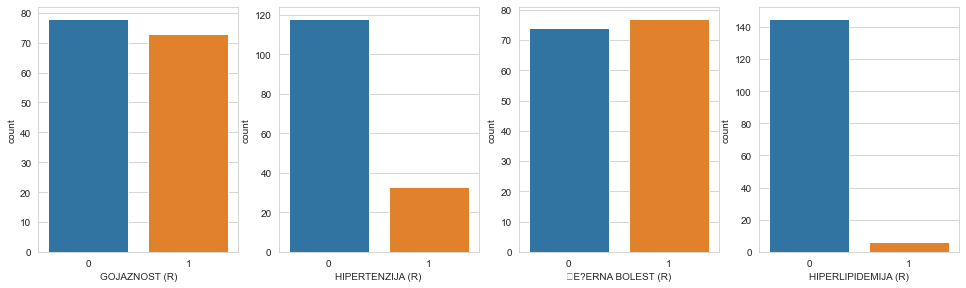

In [14]:
fig1,ax=plt.subplots(figsize=(16.5, 4.5),nrows=1,ncols=4)

sns.set_style("whitegrid")
sns.countplot(ax=ax[0],x='GOJAZNOST (R)',data=df)
sns.countplot(ax=ax[1],x='HIPERTENZIJA (R)',data=df)
sns.countplot(ax=ax[2],x='E?ERNA BOLEST (R)',data=df)
sns.countplot(ax=ax[3],x='HIPERLIPIDEMIJA (R)',data=df)
ax

### Prikaz pojave šećerne bolesti i metaboličkog sindroma kod pacijenta

<AxesSubplot:xlabel='METABOLI?KI SINDROM', ylabel='count'>

C:\Users\Tasa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tasa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0, flags=flags)


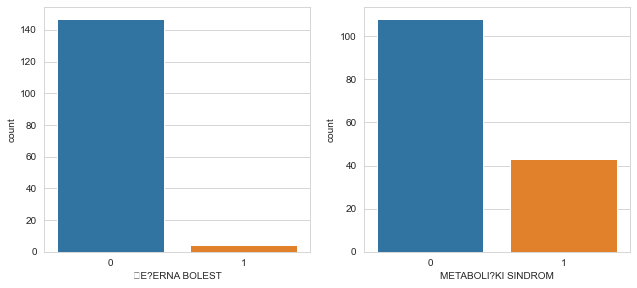

In [15]:
fig1,ax=plt.subplots(figsize=(10.5, 4.5),nrows=1,ncols=2)
sns.set_style("whitegrid")
sns.countplot(ax=ax[0],x='E?ERNA BOLEST',data=df)
sns.countplot(ax=ax[1],x='METABOLI?KI SINDROM',data=df)

### Prikaz korelacija između kolona

Kako bismo bolje shvatili kako kolone međusobno utiču jedna na drugu predtaviću njihove korelacije grafički.

<AxesSubplot:>

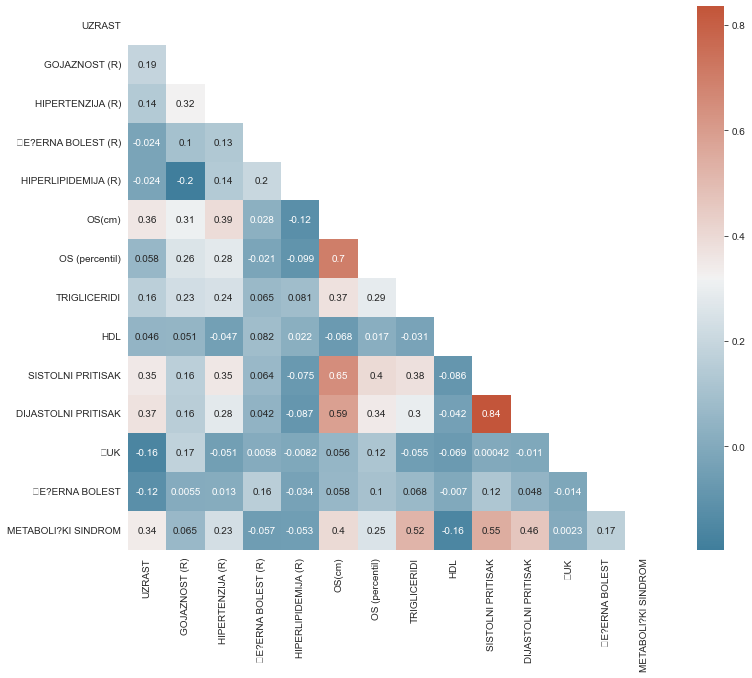

In [16]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data=df.corr(), annot=True, mask = mask, cmap=cmap)

Iz priloženog vidimo da najveće međusobne korelacije imaju sistolni i dijastolni pritisak, kao i sistolni pritisak i obim struka u cm.

#### Prikaz korelacije sistolnog i dijastolnog pritiska

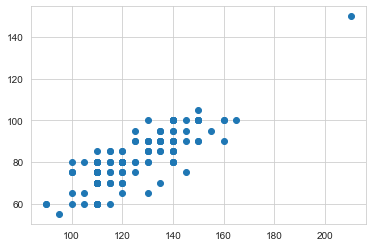

In [17]:
plt.scatter(df['SISTOLNI PRITISAK'],df['DIJASTOLNI PRITISAK'])

#### Prikaz korelacije sistolnog pritiska i obima struka u cm

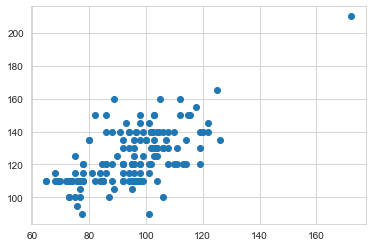

In [18]:
plt.scatter(df['OS(cm)'],df['SISTOLNI PRITISAK'])

## Predikcije

Za predviđanje neophodno je da podatke prvo podelimo u set nad kojim ćemo da treniramo modele i set nad kojim ćemo da proveramo koliko je model "dobar". Za to se koristi funkcija train_test_split, a za kasnije određivanje efikasnosti koristimo accuracy.

In [19]:
def train_test_split(df,predictor_col,test_size=0.1,random_state=1):
    df=df.sample(n=df.shape[0],random_state=random_state)
    partition=int(df.shape[0]*test_size)
    X,y=df.drop(columns=[predictor_col]),df[predictor_col]
    return np.array(X[:df.shape[0]-partition]),np.array(X[df.shape[0]-partition:]),np.array(y[:df.shape[0]-partition]),np.array(y[df.shape[0]-partition:])

def accuracy(y_true,y_pred):
    return np.sum(y_true==y_pred)/len(y_true)    

S obzirom da su podaci različitih redova veličine korisno je svesti ih na isti red kako bi model mogao bolje da ih interpretira. Da bismo to uradili koristićemo skaliranje pomoću prosečne vrednosti i standardne devijacije i svesti vrednosti na opsege od 0 do 1. Tom prilikom koristiću rescal_arr funkciju.

In [20]:
def rescale(X):
    mean = np.mean(X)
    std = np.std(X)
    scaled_X = [(i - mean)/std for i in X]
    return scaled_X

def rescale_arr(arr):
    arr1=arr
    for i in range(arr1.shape[1]):
        arr1[:][i] = rescale(arr1[:][i])
        
    return arr1
        

Dobra praksa je prvo podeliti podatke, pa onda uraditi skaliranje jer se prosečna vrednost i std razlikuju pre podele i za deo seta podataka. 

Radiću sa 3 seta podataka. Prvi set je ceo set, drugi set zasnovan je na definiciji metaboličkog sindroma u uzrastu od 10 do 16 godina, treći set podataka je onaj koji odgovara statističkim krakteristikama seta.

In [21]:
X_train,X_test,y_train,y_test=train_test_split(df,'METABOLI?KI SINDROM',test_size=0.2,random_state=1)
X_train_std=rescale_arr(X_train)
X_test_std=rescale_arr(X_test)

df_sci=df[['OS(cm)','TRIGLICERIDI','SISTOLNI PRITISAK','DIJASTOLNI PRITISAK','HDL','E?ERNA BOLEST','METABOLI?KI SINDROM']]
X_train,X_test,y_train_sci,y_test_sci=train_test_split(df_sci,'METABOLI?KI SINDROM',test_size=0.2,random_state=1)

X_train_std_sci=rescale_arr(X_train)
X_test_std_sci=rescale_arr(X_test)

df_stat=df[['UZRAST','HIPERTENZIJA (R)','OS(cm)','TRIGLICERIDI','SISTOLNI PRITISAK','HDL','E?ERNA BOLEST','METABOLI?KI SINDROM']]
X_train,X_test,y_train_stat,y_test_stat=train_test_split(df_stat,'METABOLI?KI SINDROM',test_size=0.2,random_state=1)

X_train_std_stat=rescale_arr(X_train)
X_test_std_stat=rescale_arr(X_test)


## Logistic Regression

In [22]:
class LogisticRegression:
    def __init__(self):
        self.weights=None
        self.bias=None
        
    def fit(self,X,y,gamma=0.001,iterations=100,omega1=0.9, omega2=0.99, epsilon1=1e-6,epsilon=1e-6):
        samples,features=X.shape
        self.weights=np.zeros(features)
        self.bias=0
        v_w=np.ones(shape=self.weights.shape)
        m_w=np.ones(shape=self.weights.shape)
        v_b=1
        m_b=1
        
        for i in range(iterations):
            linear_model=np.dot(X,self.weights)+self.bias
            y_pred=self.sigmoid(linear_model)
            
            dw=(2/samples)*np.dot(X.T,(y_pred-y))
            db=(2/samples)*np.sum(y_pred-y)
            
            m_w=omega1*m_w+(1-omega1)*dw
            v_w=omega2*v_w+(1-omega2)*np.multiply(dw,dw)
            hat_v_w=np.abs(v_w/(1-omega2))
            hat_m_w=m_w/(1-omega1)
            self.weights=self.weights-gamma*np.ones(shape=dw.shape)/np.sqrt(hat_v_w+epsilon1)*hat_m_w
            
            m_b=omega1*m_b+(1-omega1)*db
            v_b=omega2*v_b+(1-omega2)*db**2
            hat_v_b=abs(v_b/(1-omega2))
            hat_m_b=m_b/(1-omega1)
            self.bias=self.bias-gamma/np.sqrt(hat_v_b+epsilon1)*hat_m_b
            
            if np.linalg.norm(dw)<epsilon or db<epsilon:
                 break
    
    def predict(self,X):
        linear_model=np.dot(X,self.weights)+self.bias
        y_pred=self.sigmoid(linear_model)
        y_pred_cls=[1 if i>0.5 else 0 for i in y_pred]
        return y_pred_cls
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    

### Odredjivanje prametara

Posmatraćemo kako koeficijent učenja utiče na tačnu predikciju.

In [23]:
learning_rates = [0.001, 0.003, 0.005, 0.01,0.015]
best_acc=0
best_acc_sci=0
best_acc_stat=0
lr_best = None
lr_best_sci = None
lr_best_stat = None
acc_test=[]
acc_test_sci=[]
acc_test_stat=[]
for i in learning_rates:
    print ("learning rate is: ",i)
    print ("-------------------------------------------------------")
    models=LogisticRegression()
    models.fit(X_train_std,y_train,gamma=i,iterations=100)
    
    predictions_lr_train=models.predict(X_train_std)
    print("Logistic_regression train accuracy: ",round(accuracy(y_train,predictions_lr_train)*100),"%")
    
    predictions_lr_test=models.predict(X_test_std)
    print("Logistic_regression test accuracy: ",round(accuracy(y_test,predictions_lr_test)*100),"%")
    print ("-------------------------------------------------------")
    acc_test.append(accuracy(y_test,predictions_lr_test))
    if accuracy(y_test,predictions_lr_test)>best_acc:
                best_acc=accuracy(y_test,predictions_lr_test)
                lr_best=models

    print("Science")
    models_sci=LogisticRegression()
    models_sci.fit(X_train_std_sci,y_train_sci,gamma=i,iterations=100)
    
    predictions_lr_train=models_sci.predict(X_train_std_sci)
    print("Logistic_regression train accuracy: ",round(accuracy(y_train_sci,predictions_lr_train)*100),"%")
    
    predictions_lr_test=models_sci.predict(X_test_std_sci)
    print("Logistic_regression test accuracy: ",round(accuracy(y_test_sci,predictions_lr_test)*100),"%")
    print ("-------------------------------------------------------")
    acc_test_sci.append(accuracy(y_test_sci,predictions_lr_test))
    if accuracy(y_test_sci,predictions_lr_test)>best_acc_sci:
                best_acc_sci=accuracy(y_test_sci,predictions_lr_test)
                lr_best_sci=models_sci
    
    print("Stats")
    models_stat=LogisticRegression()
    models_stat.fit(X_train_std_stat,y_train_stat,gamma=i,iterations=100)
    
    predictions_lr_train=models_stat.predict(X_train_std_stat)
    print("Logistic_regression train accuracy: ",round(accuracy(y_train_stat,predictions_lr_train)*100),"%")
    
    predictions_lr_test=models_stat.predict(X_test_std_stat)
    print("Logistic_regression test accuracy: ",round(accuracy(y_test_stat,predictions_lr_test)*100),"%")
    print ("-------------------------------------------------------")
    print("\n")
    acc_test_stat.append(accuracy(y_test_stat,predictions_lr_test))
    if accuracy(y_test_stat,predictions_lr_test)>best_acc_stat:
                best_acc_stat=accuracy(y_test_stat,predictions_lr_test)
                lr_best_stat=models_stat
    

learning rate is:  0.001
-------------------------------------------------------
Logistic_regression train accuracy:  69 %
Logistic_regression test accuracy:  80 %
-------------------------------------------------------
Science
Logistic_regression train accuracy:  69 %
Logistic_regression test accuracy:  80 %
-------------------------------------------------------
Stats
Logistic_regression train accuracy:  69 %
Logistic_regression test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.003
-------------------------------------------------------
Logistic_regression train accuracy:  69 %
Logistic_regression test accuracy:  80 %
-------------------------------------------------------
Science
Logistic_regression train accuracy:  69 %
Logistic_regression test accuracy:  80 %
-------------------------------------------------------
Stats
Logistic_regression train accuracy:  69 %
Logistic_regression test accuracy:  80 %
------------------------------

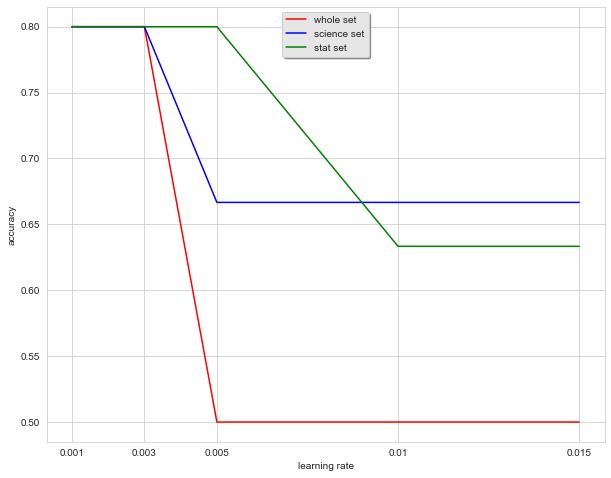

In [24]:
plt.figure(figsize=(10, 8))
plt.plot(learning_rates,acc_test,"r",label="whole set")
plt.plot(learning_rates,acc_test_sci,"b",label="science set")
plt.plot(learning_rates,acc_test_stat,"g",label="stat set")
plt.xticks(learning_rates,learning_rates)
plt.xlabel('learning rate')
plt.ylabel('accuracy')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Decision Tree Classifier

In [25]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        if (depth >= self.max_depth or n_labels == 1 or n_samples <= self.min_samples_split):
            leaf_value = self.most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
       
        if len(left_idxs)==0:
            left = Node(value=self.most_common_label(y))
        else:
            left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)

        if len(right_idxs) == 0:
            right = Node(value=self.most_common_label(y))
        else:
            right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)
    
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
    
        parent_entropy = entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def most_common_label(self,y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]

        return most_common



Kod ovog modela možemo da istražimo kako dubina stabla utiče na performanse.

In [26]:
max_depths = [5,10,15,25,50,75,100,150,250]
best_acc=0
best_acc_sci=0
best_acc_stat=0
tree_best = None
tree_best_sci = None
tree_best_stat = None
acc_trees_test=[]
acc_trees_test_sci=[]
acc_trees_test_stat=[]
for i in max_depths:
    print ("Max depth is: ",i)
    print ("-------------------------------------------------------")
    trees=DecisionTree(max_depth=i)
    trees.fit(X_train_std,y_train)
    predictions_train=trees.predict(X_train_std)
    print("Decision tree whole dataset train accuracy: ",round(accuracy(y_train,predictions_train)*100),"%")
    
    predictions_test=trees.predict(X_test_std)
    print("Decision tree whole dataset test accuracy: ",round(accuracy(y_test,predictions_test)*100),"%")
    print ("-------------------------------------------------------")
    acc_trees_test.append(accuracy(y_test,predictions_test))
    if accuracy(y_test,predictions_test)>best_acc:
                best_acc=accuracy(y_test,predictions_test)
                tree_best=trees

    print("Science")
    trees_sci=DecisionTree(max_depth=i)
    trees_sci.fit(X_train_std_sci,y_train_sci)
    
    predictions_train=trees_sci.predict(X_train_std_sci)
    print("Decision tree science dataset train accuracy: ",round(accuracy(y_train_sci,predictions_train)*100),"%")
    
    predictions_test=trees_sci.predict(X_test_std_sci)
    print("Decision tree science dataset test accuracy: ",round(accuracy(y_test_sci,predictions_test)*100),"%")
    print ("-------------------------------------------------------")
    acc_trees_test_sci.append(accuracy(y_test_sci,predictions_test))
    if accuracy(y_test_sci,predictions_test)>best_acc_sci:
                best_acc_sci=accuracy(y_test_sci,predictions_test)
                tree_best_sci=trees_sci
    
    print("Stats")
    trees_stat=DecisionTree(max_depth=i)
    trees_stat.fit(X_train_std_stat,y_train_stat)
    
    predictions_train=trees_stat.predict(X_train_std_stat)
    print("Decision tree stat dataset train accuracy: ",round(accuracy(y_train_stat,predictions_train)*100),"%")
    
    predictions_test=trees_stat.predict(X_test_std_stat)
    print("Decision tree stat dataset test accuracy: ",round(accuracy(y_test_stat,predictions_test)*100),"%")
    print ("-------------------------------------------------------")
    print("\n")
    acc_trees_test_stat.append(accuracy(y_test_stat,predictions_test))
    if accuracy(y_test_stat,predictions_test)>best_acc_stat:
                best_acc_stat=accuracy(y_test_stat,predictions_test)
                tree_best_stat=trees_stat
    

Max depth is:  5
-------------------------------------------------------
Decision tree whole dataset train accuracy:  98 %
Decision tree whole dataset test accuracy:  97 %
-------------------------------------------------------
Science
Decision tree science dataset train accuracy:  95 %
Decision tree science dataset test accuracy:  93 %
-------------------------------------------------------
Stats
Decision tree stat dataset train accuracy:  98 %
Decision tree stat dataset test accuracy:  83 %
-------------------------------------------------------


Max depth is:  10
-------------------------------------------------------
Decision tree whole dataset train accuracy:  98 %
Decision tree whole dataset test accuracy:  97 %
-------------------------------------------------------
Science
Decision tree science dataset train accuracy:  98 %
Decision tree science dataset test accuracy:  87 %
-------------------------------------------------------
Stats
Decision tree stat dataset train accuracy:

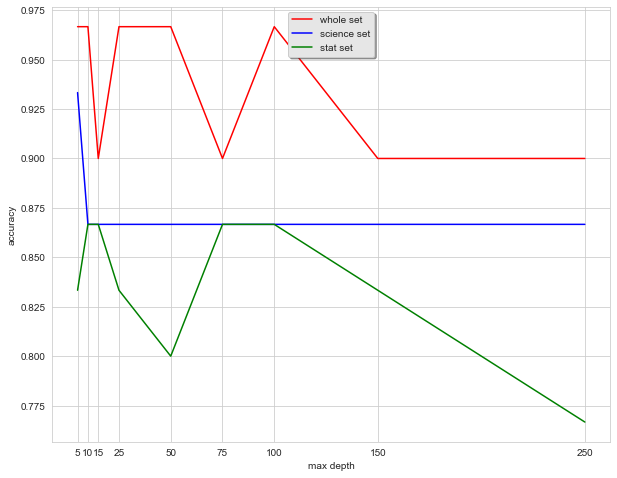

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(max_depths,acc_trees_test,"r",label="whole set")
plt.plot(max_depths,acc_trees_test_sci,"b",label="science set")
plt.plot(max_depths,acc_trees_test_stat,"g",label="stat set")

plt.xticks(max_depths,max_depths)
plt.xlabel('max depth')
plt.ylabel('accuracy')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Random Forest

In [28]:
def most_common_label(y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]

        return most_common
    
def bootstrap_sample(X,y):
    n_samples=X.shape[0]
    idxs=np.random.choice(n_samples,size=n_samples,replace=True)
    return X[idxs],y[idxs]

class RandomForest:
    def __init__(self,n_trees=100,min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees=n_trees
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_feats=n_feats
        self.trees=[]
        
    def fit(self,X,y):
        self.trees=[]
        for i in range(self.n_trees):
            tree=DecisionTree(min_samples_split=self.min_samples_split,max_depth=self.max_depth,n_feats=self.n_feats)
            X_sample,y_sample=bootstrap_sample(X,y)
            tree.fit(X_sample,y_sample)
            self.trees.append(tree)
    
    def predict(self,X):
        tree_preds=np.array([tree.predict(X) for tree in self.trees])
        tree_preds=np.swapaxes(tree_preds,0,1)
        y_pred=[most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)
   

Kod ovog modela istraživaćemo uticaj parametra n_trees.

In [29]:
n_trees = [3,5,7,10,12,15,25,50]
best_acc=0
best_acc_sci=0
best_acc_stat=0
forest_best = None
forest_best_sci = None
forest_best_stat = None
acc_forests_test=[]
acc_forests_test_sci=[]
acc_forests_test_stat=[]
for i in n_trees:
    print ("Number of trees in forest is: ",i)
    print ("-------------------------------------------------------")
    forests=RandomForest(n_trees=i)
    forests.fit(X_train_std,y_train)
    predictions_train=forests.predict(X_train_std)
    print("RandomForest whole dataset train accuracy: ",round(accuracy(y_train,predictions_train)*100),"%")
    
    predictions_test=forests.predict(X_test_std)
    print("RandomForest whole dataset test accuracy: ",round(accuracy(y_test,predictions_test)*100),"%")
    print ("-------------------------------------------------------")
    acc_forests_test.append(accuracy(y_test,predictions_test))
    if accuracy(y_test,predictions_test)>best_acc:
                best_acc=accuracy(y_test,predictions_test)
                forest_best=forests
                
    print("Science")
    forests_sci=RandomForest(n_trees=i)
    forests_sci.fit(X_train_std_sci,y_train_sci)
    
    predictions_train=forests_sci.predict(X_train_std_sci)
    print("RandomForest science dataset train accuracy: ",round(accuracy(y_train_sci,predictions_train)*100),"%")
    
    predictions_test=forests_sci.predict(X_test_std_sci)
    print("RandomForest science dataset test accuracy: ",round(accuracy(y_test_sci,predictions_test)*100),"%")
    print ("-------------------------------------------------------")
    acc_forests_test_sci.append(accuracy(y_test_sci,predictions_test))
    if accuracy(y_test_sci,predictions_test)>best_acc_sci:
                best_acc_sci=accuracy(y_test_sci,predictions_test)
                forest_best_sci=forests_sci
    
    print("Stats")
    forests_stat=RandomForest(n_trees=i)
    forests_stat.fit(X_train_std_stat,y_train_stat)
    
    predictions_train=forests_stat.predict(X_train_std_stat)
    print("RandomForest stat dataset train accuracy: ",round(accuracy(y_train_stat,predictions_train)*100),"%")
    
    predictions_test=forests_stat.predict(X_test_std_stat)
    print("RandomForest stat dataset test accuracy: ",round(accuracy(y_test_stat,predictions_test)*100),"%")
    print ("-------------------------------------------------------")
    print("\n")
    acc_forests_test_stat.append(accuracy(y_test_stat,predictions_test))
    if accuracy(y_test_stat,predictions_test)>best_acc_stat:
                best_acc_stat=accuracy(y_test_stat,predictions_test)
                forest_best_stat=forests_stat

Number of trees in forest is:  3
-------------------------------------------------------
RandomForest whole dataset train accuracy:  93 %
RandomForest whole dataset test accuracy:  97 %
-------------------------------------------------------
Science
RandomForest science dataset train accuracy:  97 %
RandomForest science dataset test accuracy:  90 %
-------------------------------------------------------
Stats
RandomForest stat dataset train accuracy:  93 %
RandomForest stat dataset test accuracy:  93 %
-------------------------------------------------------


Number of trees in forest is:  5
-------------------------------------------------------
RandomForest whole dataset train accuracy:  96 %
RandomForest whole dataset test accuracy:  93 %
-------------------------------------------------------
Science
RandomForest science dataset train accuracy:  97 %
RandomForest science dataset test accuracy:  87 %
-------------------------------------------------------
Stats
RandomForest stat dat

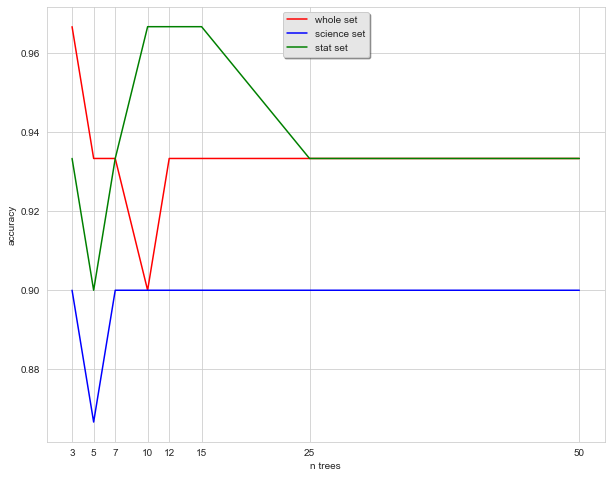

In [30]:
plt.figure(figsize=(10, 8))
plt.plot(n_trees,acc_forests_test,"r",label="whole set")
plt.plot(n_trees,acc_forests_test_sci,"b",label="science set")
plt.plot(n_trees,acc_forests_test_stat,"g",label="stat set")

plt.xticks(n_trees,n_trees)
plt.xlabel('n trees')
plt.ylabel('accuracy')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## K-nearest neighbor

In [31]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)
class KNN:
    def __init__(self,k=3):
        self.k=k
        
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y
        
    
    def predict(self,X):
        predicted_labels=[self.predicted_label(x) for x in X]
        return np.array(predicted_labels)
    
    def predicted_label(self,x):
        distances=[euclidean_distance(x,x_train) for x_train in self.X_train]
        k_indices=np.argsort(distances)[:self.k]
        k_nearest_labels=[self.y_train[i] for i in k_indices]
        return most_common_label(k_nearest_labels)

Proučavamo parametar "k" koji modelu kazuje koliko najbližih komšija da posmatra.

In [32]:
k = [3,5,7,10,12,15,25,50,100]
best_acc=0
best_acc_sci=0
best_acc_stat=0
knns_best = None
knns_best_sci = None
knns_best_stat = None
acc_knns_test=[]
acc_knns_test_sci=[]
acc_knns_test_stat=[]
for i in k:
    print ("Number of neighbors is: ",i)
    print ("-------------------------------------------------------")
    knns=KNN(k=i)
    knns.fit(X_train_std,y_train)
    predictions_train=knns.predict(X_train_std)
    print("KNN whole dataset train accuracy: ",round(accuracy(y_train,predictions_train)*100),"%")
    
    predictions_test=knns.predict(X_test_std)
    print("KNN whole dataset test accuracy: ",round(accuracy(y_test,predictions_test)*100),"%")
    print ("-------------------------------------------------------")
    acc_knns_test.append(accuracy(y_test,predictions_test))
    if accuracy(y_test,predictions_test)>best_acc:
                best_acc=accuracy(y_test,predictions_test)
                knns_best=knns
                
    print("Science")
    knns_sci=KNN(k=i)
    knns_sci.fit(X_train_std_sci,y_train_sci)
    
    predictions_train=knns_sci.predict(X_train_std_sci)
    print("KNN science dataset train accuracy: ",round(accuracy(y_train_sci,predictions_train)*100),"%")
    
    predictions_test=knns_sci.predict(X_test_std_sci)
    print("KNN science dataset test accuracy: ",round(accuracy(y_test_sci,predictions_test)*100),"%")
    print ("-------------------------------------------------------")
    acc_knns_test_sci.append(accuracy(y_test_sci,predictions_test))
    if accuracy(y_test_sci,predictions_test)>best_acc_sci:
                best_acc_sci=accuracy(y_test_sci,predictions_test)
                knns_best_sci=knns_sci
    
    print("Stats")
    knns_stat=KNN(k=i)
    knns_stat.fit(X_train_std_stat,y_train_stat)
    
    predictions_train=knns_stat.predict(X_train_std_stat)
    print("KNN stat dataset train accuracy: ",round(accuracy(y_train_stat,predictions_train)*100),"%")
    
    predictions_test=knns_stat.predict(X_test_std_stat)
    print("KNN stat dataset test accuracy: ",round(accuracy(y_test_stat,predictions_test)*100),"%")
    print ("-------------------------------------------------------")
    print("\n")
    acc_knns_test_stat.append(accuracy(y_test_stat,predictions_test))
    if accuracy(y_test_stat,predictions_test)>best_acc_stat:
                best_acc_stat=accuracy(y_test_stat,predictions_test)
                knns_best_stat=knns_stat

Number of neighbors is:  3
-------------------------------------------------------
KNN whole dataset train accuracy:  83 %
KNN whole dataset test accuracy:  87 %
-------------------------------------------------------
Science
KNN science dataset train accuracy:  85 %
KNN science dataset test accuracy:  83 %
-------------------------------------------------------
Stats
KNN stat dataset train accuracy:  85 %
KNN stat dataset test accuracy:  73 %
-------------------------------------------------------


Number of neighbors is:  5
-------------------------------------------------------
KNN whole dataset train accuracy:  80 %
KNN whole dataset test accuracy:  83 %
-------------------------------------------------------
Science
KNN science dataset train accuracy:  82 %
KNN science dataset test accuracy:  83 %
-------------------------------------------------------
Stats
KNN stat dataset train accuracy:  84 %
KNN stat dataset test accuracy:  90 %
----------------------------------------------

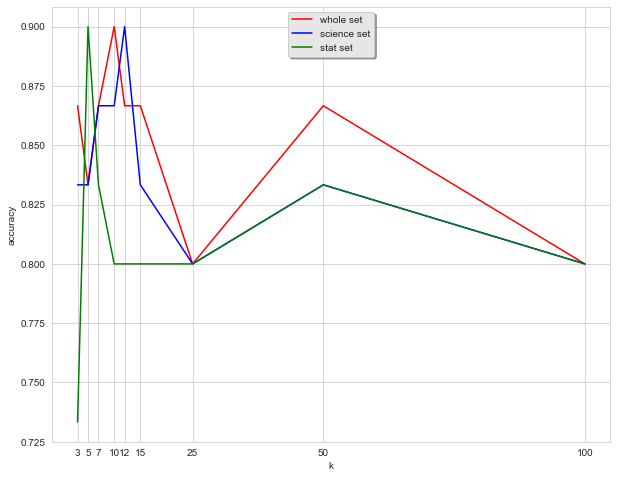

In [33]:
plt.figure(figsize=(10, 8))
plt.plot(k,acc_knns_test,"r",label="whole set")
plt.plot(k,acc_knns_test_sci,"b",label="science set")
plt.plot(k,acc_knns_test_stat,"g",label="stat set")

plt.xticks(k,k)
plt.xlabel('k')
plt.ylabel('accuracy')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Support vector machine

In [44]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y,omega1=0.9, omega2=0.99, epsilon1=1e-6,epsilon=1e-6):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0
        
#         for _ in range(self.n_iters):
#             for idx, x_i in enumerate(X):
#                 condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
#                 if condition:
#                     self.w -= self.lr * (2 * self.lambda_param * self.w)
#                 else:
#                     self.w -= self.lr * (
#                         2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
#                     )
#                     self.b -= self.lr * y_[idx]

        
        v_w=np.ones(shape=self.w.shape)
        m_w=np.ones(shape=self.w.shape)
        v_b=1
        m_b=1
        
    
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    dw=2 * self.lambda_param * self.w
                    db=0
                    
                    m_w=omega1*m_w+(1-omega1)*dw
                    v_w=omega2*v_w+(1-omega2)*np.multiply(dw,dw)
                    hat_v_w=np.abs(v_w/(1-omega2))
                    hat_m_w=m_w/(1-omega1)
                    self.w-=self.lr*np.ones(shape=dw.shape)/np.sqrt(hat_v_w+epsilon1)*hat_m_w 

                else:
                    dw=2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    db=y_[idx]

                    m_w=omega1*m_w+(1-omega1)*dw
                    v_w=omega2*v_w+(1-omega2)*np.multiply(dw,dw)
                    hat_v_w=np.abs(v_w/(1-omega2))
                    hat_m_w=m_w/(1-omega1)
                    self.w-=self.lr*np.ones(shape=dw.shape)/np.sqrt(hat_v_w+epsilon1)*hat_m_w 

                    m_b=omega1*m_b+(1-omega1)*db
                    v_b=omega2*v_b+(1-omega2)*db**2
                    hat_v_b=abs(v_b/(1-omega2))
                    hat_m_b=m_b/(1-omega1)
                    self.b-=self.lr/np.sqrt(hat_v_b+epsilon1)*hat_m_b

                if np.linalg.norm(dw)<epsilon:
                    break

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.where(np.sign(approx) == -1,0,1)

Istražujemo vrednost koeficijenta učenja i lambda parametra.

In [45]:
learning_rates = [0.1, 0.3, 0.5, 0.1,0.5]
lambda_params=[0.01,0.1,0.15]
iters=[2,3,5,7,10,15]
acc_svm_test=[]
acc_svm_test_sci=[]
acc_svm_test_stat=[]
best_acc=0
best_acc_sci=0
best_acc_stat=0
best_model=None
best_model_sci=None
best_model_stat=None
# y_train_svm = np.where(y_train == 0, -1, 1)
# y_train_svm_sci = np.where(y_train_sci == 0, -1, 1)
# y_train_svm_stat = np.where(y_train_stat == 0, -1, 1)
# y_test_svm = np.where(y_test == 0, -1, 1)
# y_test_svm_sci = np.where(y_test_sci == 0, -1, 1)
# y_test_svm_stat = np.where(y_test_stat == 0, -1, 1)
y_train_svm = y_train 
y_train_svm_sci = y_train_sci 
y_train_svm_stat = y_train_stat
y_test_svm = y_test 
y_test_svm_sci = y_test_sci 
y_test_svm_stat = y_test_stat 
for i in learning_rates:
    for j in lambda_params:
        for it in iters:
            print ("learning rate is: ",i)
            print ("lambda is: ",j)
            print("Number of iterations is: ",it)
            print ("-------------------------------------------------------")
            svm=SVM(learning_rate=i, lambda_param=j, n_iters=it)
            svm.fit(X_train_std,y_train_svm)

            predictions_train=svm.predict(X_train_std)
            print("SVM train accuracy: ",round(accuracy(y_train_svm,predictions_train)*100),"%")

            predictions_test=svm.predict(X_test_std)
            print("SVM test accuracy: ",round(accuracy(y_test_svm,predictions_test)*100),"%")
            print ("-------------------------------------------------------")
            acc_svm_test.append(accuracy(y_test_svm,predictions_test))
            if accuracy(y_test_svm,predictions_test)>best_acc:
                best_acc=accuracy(y_test_svm,predictions_test)
                best_model=svm

            print("Science")
            svm_sci=SVM(learning_rate=i, lambda_param=j, n_iters=it)
            svm_sci.fit(X_train_std_sci,y_train_svm_sci)

            predictions_train=svm_sci.predict(X_train_std_sci)
            print("SVM train accuracy: ",round(accuracy(y_train_svm_sci,predictions_train)*100),"%")

            predictions_test=svm_sci.predict(X_test_std_sci)
            print("SVM test accuracy: ",round(accuracy(y_test_svm_sci,predictions_test)*100),"%")
            print ("-------------------------------------------------------")
            acc_svm_test_sci.append(accuracy(y_test_svm_sci,predictions_test))
            if accuracy(y_test_svm_sci,predictions_test)>best_acc_sci:
                best_acc_sci=accuracy(y_test_svm_sci,predictions_test)
                best_model_sci=svm_sci
                
            print("Stats")
            svm_stat=SVM(learning_rate=i, lambda_param=j, n_iters=it)
            svm_stat.fit(X_train_std_stat,y_train_svm_stat)

            predictions_train=svm_stat.predict(X_train_std_stat)
            print("SVM train accuracy: ",round(accuracy(y_train_svm_stat,predictions_train)*100),"%")

            predictions_test=svm_stat.predict(X_test_std_stat)
            print("SVM test accuracy: ",round(accuracy(y_test_svm_stat,predictions_test)*100),"%")
            print ("-------------------------------------------------------")
            print("\n")
            acc_svm_test_stat.append(accuracy(y_test_svm_stat,predictions_test))
            if accuracy(y_test_svm_stat,predictions_test)>best_acc_stat:
                best_acc_stat=accuracy(y_test_svm_stat,predictions_test)
                best_model_stat=svm_stat
    

learning rate is:  0.1
lambda is:  0.01
Number of iterations is:  2
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Science
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Stats
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.1
lambda is:  0.01
Number of iterations is:  3
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Science
SVM train accuracy:  79 %
SVM test accuracy:  90 %
-------------------------------------------------------
Stats
SVM train accuracy:  48 %
SVM test accuracy:  43 %
-------------------------------------------------------


learning rate is:  0.1
lambda is:  0.01
Number of iterations is:  5
----------

SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Science
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Stats
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.3
lambda is:  0.01
Number of iterations is:  7
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Science
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Stats
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.3
lambda is:  0.01
Number of iterations is:  10
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
--------------------------

SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Science
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Stats
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.5
lambda is:  0.01
Number of iterations is:  7
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Science
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Stats
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.5
lambda is:  0.01
Number of iterations is:  10
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
--------------------------

SVM train accuracy:  62 %
SVM test accuracy:  50 %
-------------------------------------------------------
Science
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Stats
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.1
lambda is:  0.01
Number of iterations is:  7
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Science
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Stats
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.1
lambda is:  0.01
Number of iterations is:  10
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
--------------------------

SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Science
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Stats
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.5
lambda is:  0.01
Number of iterations is:  7
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Science
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------
Stats
SVM train accuracy:  69 %
SVM test accuracy:  80 %
-------------------------------------------------------


learning rate is:  0.5
lambda is:  0.01
Number of iterations is:  10
-------------------------------------------------------
SVM train accuracy:  69 %
SVM test accuracy:  80 %
--------------------------

## Ceo dataset

In [39]:
predictions_lr_test=lr_best.predict(X_test_std)
print("Logistic_regression test accuracy: ",round(accuracy(y_test,predictions_lr_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=tree_best.predict(X_test_std)
print("Decision tree whole dataset test accuracy: ",round(accuracy(y_test,predictions_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=forest_best.predict(X_test_std)
print("RandomForest whole dataset test accuracy: ",round(accuracy(y_test,predictions_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=knns_best.predict(X_test_std)
print("KNN whole dataset test accuracy: ",round(accuracy(y_test,predictions_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=best_model.predict(X_test_std)
print("SVM test accuracy: ",round(accuracy(y_test_svm,predictions_test)*100),"%")
print ("-------------------------------------------------------")

Logistic_regression test accuracy:  80 %
-------------------------------------------------------
Decision tree whole dataset test accuracy:  97 %
-------------------------------------------------------
RandomForest whole dataset test accuracy:  97 %
-------------------------------------------------------
KNN whole dataset test accuracy:  90 %
-------------------------------------------------------
SVM test accuracy:  87 %
-------------------------------------------------------


## Nauka podaci

In [41]:
predictions_lr_test=lr_best_sci.predict(X_test_std_sci)
print("Logistic_regression test accuracy: ",round(accuracy(y_test_sci,predictions_lr_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=tree_best_sci.predict(X_test_std_sci)
print("Decision tree dataset test accuracy: ",round(accuracy(y_test_sci,predictions_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=forest_best_sci.predict(X_test_std_sci)
print("RandomForest test accuracy: ",round(accuracy(y_test_sci,predictions_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=knns_best_sci.predict(X_test_std_sci)
print("KNN test accuracy: ",round(accuracy(y_test_sci,predictions_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=best_model_sci.predict(X_test_std_sci)
print("SVM test accuracy: ",round(accuracy(y_test_svm_sci,predictions_test)*100),"%")
print ("-------------------------------------------------------")

Logistic_regression test accuracy:  80 %
-------------------------------------------------------
Decision tree dataset test accuracy:  93 %
-------------------------------------------------------
RandomForest test accuracy:  90 %
-------------------------------------------------------
KNN test accuracy:  90 %
-------------------------------------------------------
SVM test accuracy:  90 %
-------------------------------------------------------


## Statistika podaci

In [42]:
predictions_lr_test=lr_best_stat.predict(X_test_std_stat)
print("Logistic_regression test accuracy: ",round(accuracy(y_test_stat,predictions_lr_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=tree_best_stat.predict(X_test_std_stat)
print("Decision tree test accuracy: ",round(accuracy(y_test_stat,predictions_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=forest_best_stat.predict(X_test_std_stat)
print("RandomForest test accuracy: ",round(accuracy(y_test_stat,predictions_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=knns_best_stat.predict(X_test_std_stat)
print("KNN  test accuracy: ",round(accuracy(y_test_stat,predictions_test)*100),"%")
print ("-------------------------------------------------------")
predictions_test=best_model_stat.predict(X_test_std_stat)
print("SVM test accuracy: ",round(accuracy(y_test_svm_stat,predictions_test)*100),"%")
print ("-------------------------------------------------------")

Logistic_regression test accuracy:  80 %
-------------------------------------------------------
Decision tree test accuracy:  87 %
-------------------------------------------------------
RandomForest test accuracy:  97 %
-------------------------------------------------------
KNN  test accuracy:  90 %
-------------------------------------------------------
SVM test accuracy:  83 %
-------------------------------------------------------
